# Pràctica 6. Ajust de dades
## 1 Regressió lineal
#### Exemple 1.1 

In [1]:
edat=[18,23,25,35,65,54,34,56,72,19,23,42,18,39,37]
f_max=[202,186,187,180,156,169,174,172,153,199,193,174,198,183,178]

In [2]:
ndades=len(edat)

In [3]:
dades=[(edat[k],f_max[k]) for k in range(ndades)]

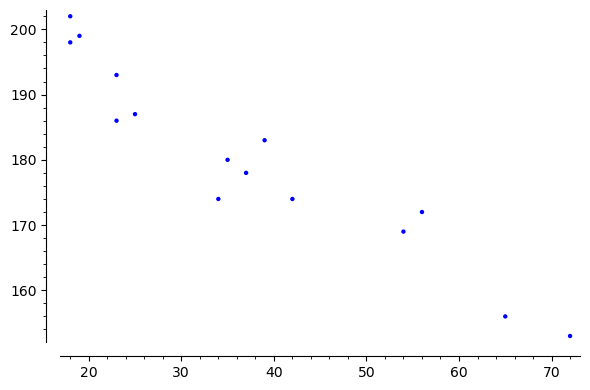

In [4]:
point(dades)

In [5]:
var('a b')

(a, b)

In [6]:
f_max_teor=[a*edat[k]+b for k in range(ndades)]

In [7]:
r=vector(f_max_teor)-vector(f_max)

In [8]:
show(r)

(18*a + b - 202, 23*a + b - 186, 25*a + b - 187, 35*a + b - 180, 65*a + b - 156, 54*a + b - 169, 34*a + b - 174, 56*a + b - 172, 72*a + b - 153, 19*a + b - 199, 23*a + b - 193, 42*a + b - 174, 18*a + b - 198, 39*a + b - 183, 37*a + b - 178)

#### Exercici 1.1

In [9]:
def n(r):
    h=0
    for i in range(len(r)):
        h=h+r[i]^2
    return sqrt(h)

In [10]:
h(a,b)=n(r)

In [11]:
h_sim=h.simplify_full()
show(h_sim)

sqrt(25188*a^2 + 32*(35*a - 169)*b + 15*b^2 - 195068*a + 490438)

In [51]:
eq1=solve(diff(h_sim,a),a); eq1

[a == -140/6297*b + 48767/12594]

In [52]:
eq2=solve(diff(h_sim,b),b); eq2

[b == -112/3*a + 2704/15]

In [14]:
sol=solve([eq1[0],eq2[0]],(a,b))

In [15]:
show(sol)

[[a == (-5123/6422), b == (3372328/16055)]]

In [16]:
a=sol[0][0].rhs(); a

-5123/6422

In [17]:
b=sol[0][1].rhs(); b

3372328/16055

In [18]:
recta(x)=a*x+b

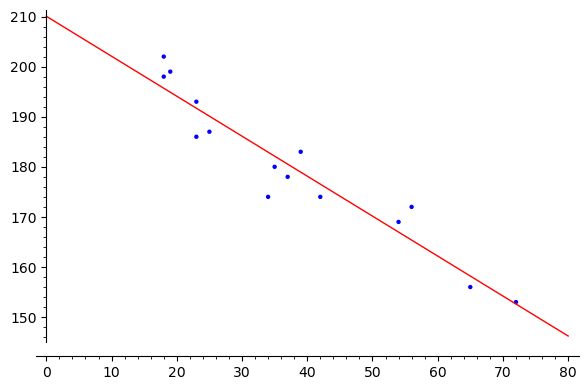

In [19]:
point(dades)+plot(recta,x,0,80, color='red')

#### Exercici 1.2

In [20]:
r_2=[r[i]^2 for i in range(len(r))]

In [21]:
suma=sum(r_2)

In [22]:
sumaquadrats(a,b)=suma.simplify_full(); sumaquadrats

(a, b) |--> 25188*a^2 + 32*(35*a - 169)*b + 15*b^2 - 195068*a + 490438

In [23]:
eq1_1=solve(sumaquadrats.diff(a),a); eq1

[a == -140/6297*b + 48767/12594]

In [24]:
eq2_2=solve(sumaquadrats.diff(b),b)

In [25]:
sol1=solve([eq1[0],eq2[0]],(a,b))
show(sol1)

[[a == (-5123/6422), b == (3372328/16055)]]

#### Exercici 1.3

In [26]:
f(x)=a*x+b
f

x |--> a*x + b

In [27]:
find_fit(dades,f)

[a == -0.7977265649369627, b == 210.04845842462285]

#### Exercici 1.4

In [28]:
alçada=[75,86,95,108,112,126,135,151,155,160]
pes=[10,12,15,17,20,27,35,41,48,50]

In [29]:
data=[(alçada[k],pes[k]) for k in range(len(pes))]

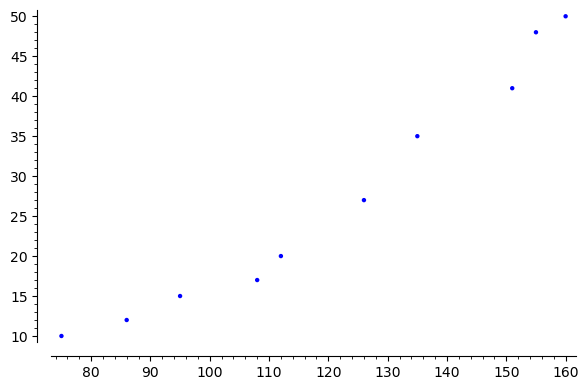

In [30]:
point(data)

In [31]:
f_pes_teor=[a*alçada[i]+b for i in range(len(alçada))]

In [32]:
error=vector(f_pes_teor)-vector(pes)
show(error)

(75*a + b - 10, 86*a + b - 12, 95*a + b - 15, 108*a + b - 17, 112*a + b - 20, 126*a + b - 27, 135*a + b - 35, 151*a + b - 41, 155*a + b - 48, 160*a + b - 50)

In [33]:
g(x)=a*x+b

In [34]:
sol=find_fit(data,g)
show(sol)

[a == 0.49112293892024395, b == -31.58208955230996]

In [35]:
a=sol[0].rhs()
b=sol[1].rhs()

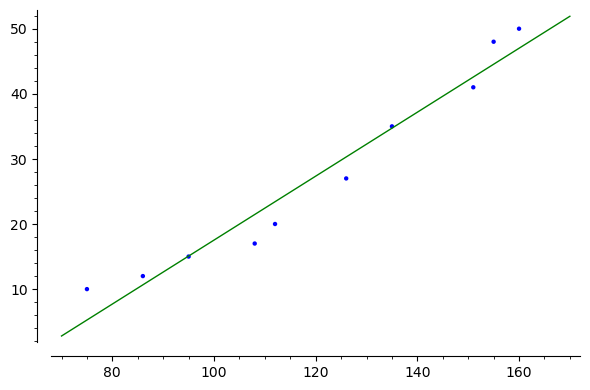

In [36]:
point(data)+plot(a*x+b,x,70,170, color='green')

## 2 Determinació experimental d'un model no lineal
#### 2.1 Exercici 2.1

In [37]:
c=[0.005,0.02,0.05,0.08,0.12,0.16,0.2,0.025,0.1,0.25,0.4,0.6,0.8,1.0]
v=[4.190,7.449,8.931,9.312,12.204,13.473,14.8,4.034,9.65,12.598,12.922,14.509,13.228,14.461]

In [38]:
datas=[(c[k],v[k]) for k in range(len(c))]

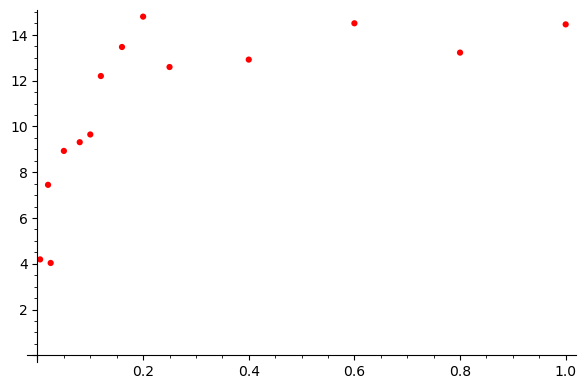

In [39]:
point(datas, color='red',size=20, xmin=0, ymin=0)

In [40]:
inv_experiment=[(1/c[k],1/v[k]) for k in range(len(c))]

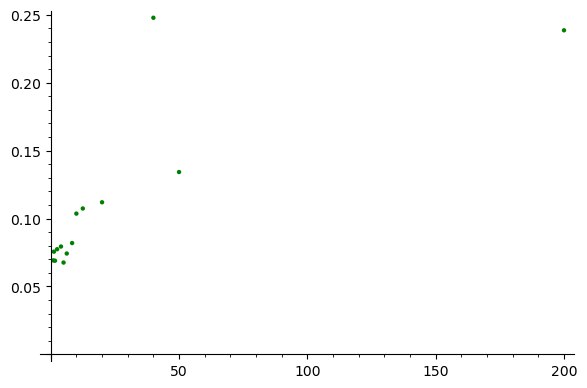

In [41]:
point(inv_experiment,color='green',xmin=0,ymin=0)

In [42]:
del(a,b)

In [43]:
var('a b')

(a, b)

In [44]:
model_recta(x)=a*x+b

In [45]:
model_recta

x |--> a*x + b

In [46]:
sol=find_fit(inv_experiment,model_recta)
show(sol)

[a == 0.0008845966358557757, b == 0.08694915040897483]

In [47]:
a1=sol[0].rhs()
b1=sol[1].rhs()

In [48]:
model_recta_sol(x)=model_recta.subs(a=a1,b=b1)

In [49]:
model_recta_sol(x)

0.0008845966358557757*x + 0.08694915040897483

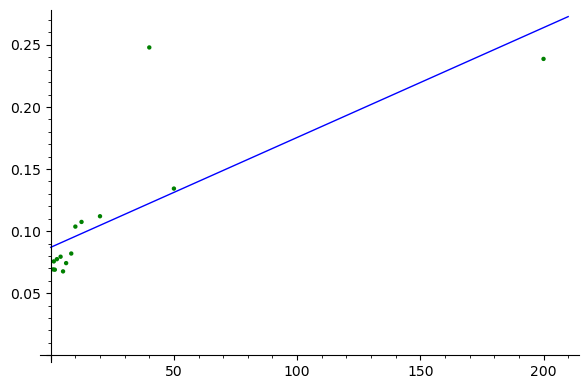

In [57]:
point(inv_experiment,color='green',xmin=0,ymin=0)+plot(model_recta_sol(x),x,0,210)

In [58]:
Vm_recta=1/b1
K_recta=a1/b1

In [59]:
activitat_recta(c)=Vm_recta*c/(K_recta+c)

In [60]:
activitat_recta(2)

11.442767165068847

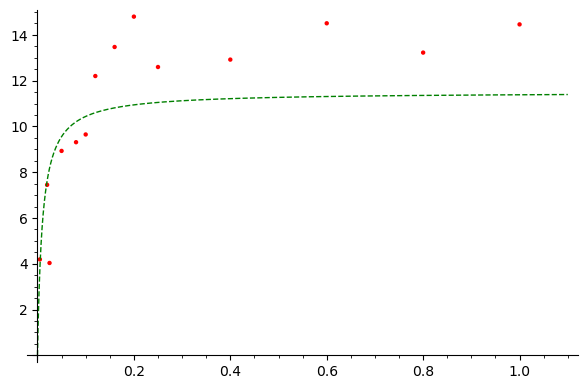

In [61]:
point(datas,color='red',xmin=0,ymin=0)+plot(activitat_recta,c,0,1.1,color='green',linestyle='--')

#### Exercici 2.2

In [62]:
var('Vm K')

(Vm, K)

In [63]:
model_llei(c)=Vm*c/(K+c)

In [65]:
sol1=find_fit(datas,model_llei); sol1

[K == 0.032305033134052356, Vm == 14.733601556751266]

In [66]:
K1=sol1[0].rhs()
Vm1=sol1[1].rhs()

In [67]:
activitat(c)=model_llei.subs(K=K1,Vm=Vm1)

In [68]:
p(x)=15

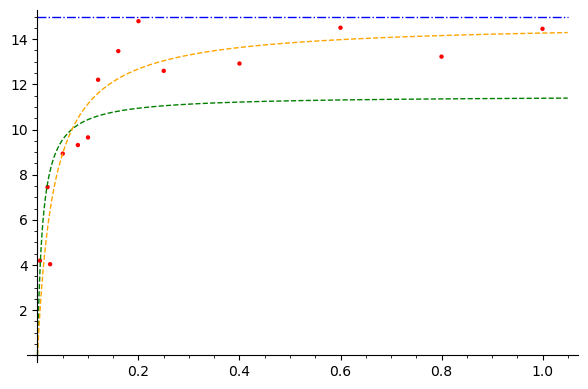

In [69]:
point(datas,color='red')+plot(activitat_recta,c,0,1.05,color='green',linestyle='--')+plot(activitat,c,0,1.05,color='orange',linestyle='--')+plot(p,c,0,1.05,linestyle='-.')

#### Exercici 2.3

In [ ]:
error1_2=[(v[k]-activitat_recta(c[k]))^2 for k in range(len(v))]

In [ ]:
sum_error1_2=sum(error1_2)
show(sum_error1_2)

In [ ]:
error2_2=[(v[k]-activitat(c[k]))^2 for k in range(len(v))]

In [ ]:
sum_error2_2=sum(error2_2)
show(sum_error2_2)